# Machine Learning Exercise 7 - K-means and PCA
Programming exercise for Andrew Ng's Machine Learning Class on Coursera written in python 3.4.

## K-means Clustering Implementation

In this exercise, we will implement the K-means algorithm and use it for image compression. We will start with a 2D dataset to gain an intuition of how the K-means algorithm works.

### Part 1: Finding Closest Centroids

"Cluster Assignment": assigns every training examples x(i) to its closest centroid, given the current positions of centroids. The following function returns idx: index of the centroid that is closest to x(i).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
plt.rcParams['figure.figsize'] = (10, 8)
%matplotlib inline

In [2]:
def findClosestCentroids(X, centroids):
    """input: data matrix X and locations of all centroids.
    output: 1-D array idx that holds the index of the closest centroid to every training example."""
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        cost = 10000
        for j in range(k):
            dist = (np.linalg.norm(X[i] - centroids[j]))**2
            if dist < cost:
                cost = dist
                idx[i] = j
    return idx

In [3]:
matfile = loadmat('./machine-learning-ex7/ex7/ex7data2.mat')
X = matfile['X']

In [4]:
K = 3
init_centroids = np.array([[3,3], [6,2], [8,5]])
print('Find closest centroids.')
idx = findClosestCentroids(X, init_centroids)
print('Closest centroids for the first 3 examples:')
print('{}'.format(idx[:3]))

Find closest centroids.
Closest centroids for the first 3 examples:
[ 0.  2.  1.]


### Part 2: Computing Centroid Means

Given assignments for every point to a centroid, now we will recompute, for each centroid, the mean of the points that were assigned to it.

In [5]:
def computeCentroids(X, idx, K):
    """returns the new centroids by computing the means of the data points assigned to each centroid."""
    centroids = np.zeros((K, X.shape[1]))
    for j in range(K):
        centroids[j] = np.mean(X[np.where(idx==j)], axis=0)
    return centroids

In [6]:
print('Computing centroids means.')
print('Centroids computed after initial finding of closest centroids:')
computeCentroids(X, idx, K)

Computing centroids means.
Centroids computed after initial finding of closest centroids:


array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

## K-means on Example Dataset

In [7]:
def runKMeans(X, init_centroids, max_iters):
    """returns centroids and idx after max_iters number of iterations."""
    centroids = init_centroids
    cent_dict = {}
    K = init_centroids.shape[0]
    
    for j in range(K):
        cent_dict[j] = init_centroids[j]
    
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        new_centroids = computeCentroids(X, idx, K)
        for j in range(K):
            cent_dict[j] = np.vstack((cent_dict[j], new_centroids[j]))
        centroids = new_centroids
    
    return idx.astype('int'), cent_dict

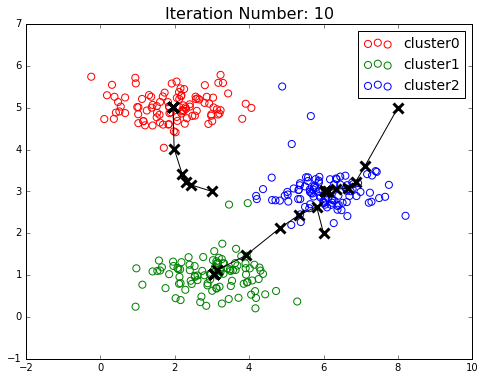

In [8]:
idx, cent_dict = runKMeans(X, init_centroids, 10)

colors = ['r', 'g', 'b']

plt.subplots(figsize=(8, 6))

for i in sorted(np.unique(idx)):
    plt.scatter(X[np.where(idx==i)][:,0], X[np.where(idx==i)][:,1], s=50, facecolors='none', edgecolors=colors[i], label='cluster{}'.format(i))

for j in range(len(cent_dict)):
    plt.plot(cent_dict[j][:,0], cent_dict[j][:,1], marker='x', ms=10, mew=3, c='black')
plt.title('Iteration Number: 10', fontsize=16)
plt.legend(loc='best', fontsize=14)

In [9]:
cent_dict[0][-1], cent_dict[1][-1], cent_dict[2][-1]

(array([ 1.95399466,  5.02557006]),
 array([ 3.04367119,  1.01541041]),
 array([ 6.03366736,  3.00052511]))

In [10]:
def kMeansInitCentroids(X, K):
    index = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[index]
    return centroids

In [11]:
kMeansInitCentroids(X, K)

array([[ 0.3639172 ,  4.73332823],
       [ 3.27844295,  1.75043926],
       [ 5.74036233,  3.10391306]])

### Solution with sklearn

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(K, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
kmeans.cluster_centers_

array([[ 3.04367119,  1.01541041],
       [ 6.03366736,  3.00052511],
       [ 1.95399466,  5.02557006]])

## Image Compression with K-means

Use the K-means algorithm to select the 16 colors that will be used to represent the compressed image and replace the pixels in the original image with the 16 colors.

In [15]:
image = plt.imread('./machine-learning-ex7/ex7/bird_small.png')
image.shape

(128, 128, 3)

In [16]:
pixels = image.reshape((128*128, 3))

In [17]:
K = 16
init_centroids = kMeansInitCentroids(pixels, K)
idx, cent_dict = runKMeans(pixels, init_centroids, 10)

In [18]:
centroids = np.array([cent_dict[i][-1] for i in cent_dict.keys()])

In [19]:
new_pixels = np.zeros_like(pixels)
for i in range(pixels.shape[0]):
    new_pixels[i] = centroids[idx[i]]

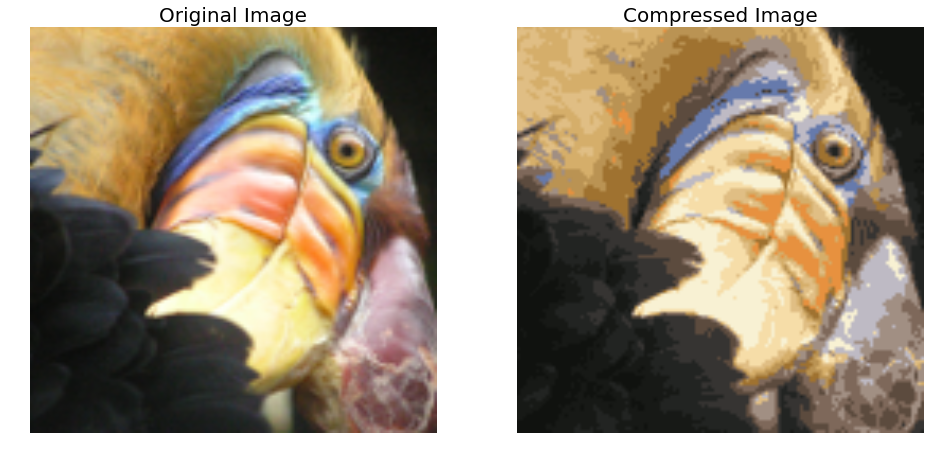

In [20]:
new_pixels = new_pixels.reshape((128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].imshow(image)
axes[0].set_title('Original Image', fontsize=20)
axes[1].imshow(new_pixels)
axes[1].set_title('Compressed Image', fontsize=20)

for ax in axes:
    ax.axis('off')

### Solution with sklearn

In [21]:
kmeans_image = KMeans(K)
kmeans_image.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
km_pixels = kmeans_image.cluster_centers_[kmeans_image.labels_].reshape((128, 128, 3))

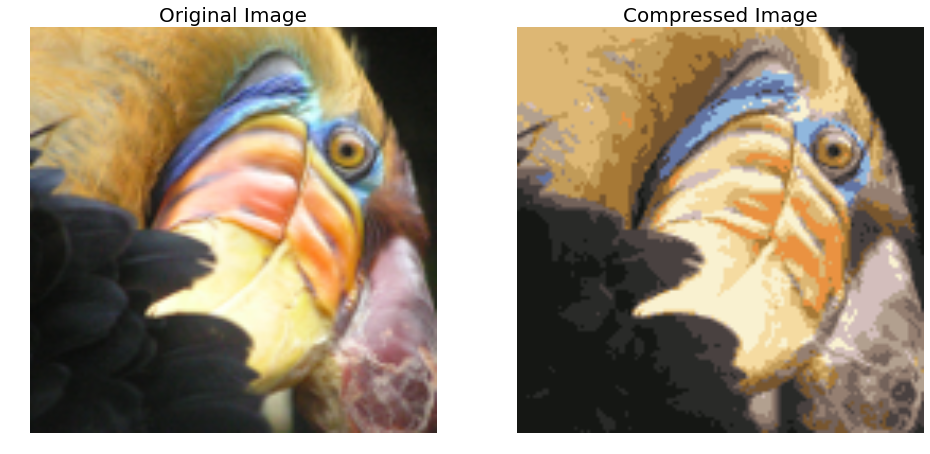

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].imshow(image)
axes[0].set_title('Original Image', fontsize=20)
axes[1].imshow(km_pixels)
axes[1].set_title('Compressed Image', fontsize=20)

for ax in axes:
    ax.axis('off')

## Principal Component Analysis

### Solution with sklearn

Let's first look at the shortcut with sklearn.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
data2 = loadmat('./machine-learning-ex7/ex7/ex7data1.mat')
data2.keys()

dict_keys(['__globals__', '__header__', '__version__', 'X'])

In [26]:
X = data2['X']

In [27]:
pca = PCA(1)
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_reduced = pca.fit_transform(X_scaled)
X_recovered = scale.inverse_transform(pca.inverse_transform(X_reduced))

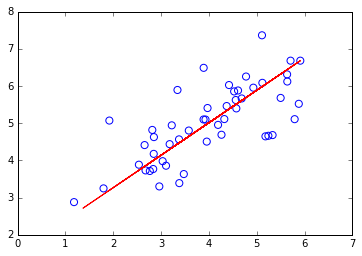

In [28]:
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='blue', s=50)
plt.plot(X_recovered[:,0], X_recovered[:,1], 'r-')

### Implementing PCA

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range. StandardScaler() in sklearn will readily do the job for you.

In [29]:
def featureNormalize(data):
    """Same as StandardScaler()"""
    return (data - data.mean(axis=0)) / data.std(axis=0)

After normalizing the data, we can run PCA to compute the principal components. To implement PCA, we should first compute the covariance matrix and run SVD to compute the eigenvectors (u) and eigenvalues (v) of the covariance matrix. In the output, s is the diagonal matrix.

In [30]:
def pca(data_scaled):
    sigma = np.dot(data_scaled.T, data_scaled) / data_scaled.shape[0]
    u, s, v = np.linalg.svd(sigma)
    return u, s, v

In [31]:
K=1
X_norm = featureNormalize(X)
u, s, v = pca(X_norm)

Use the first K columns of u as the reduced dimensions and project each example onto the lower dimensional space x(i) -> z(i). The data can be approximately recovered by projecting them back onto the original high dimensional space.

In [32]:
z = np.dot(X_norm, u[:,:K])
X_recovered = np.dot(z, u[:,:K].T)

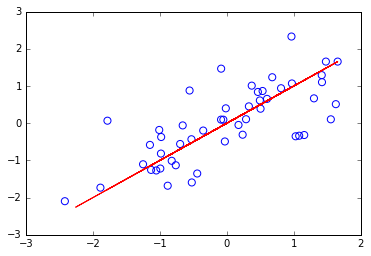

In [33]:
plt.scatter(X_norm[:,0], X_norm[:,1], facecolors='none', edgecolors='blue', s=50)
plt.plot(X_recovered[:,0], X_recovered[:,1], c='r')

Plotting the original data overlayed by vectors with maximum variations.

Lines with maximum variations in the dataset.


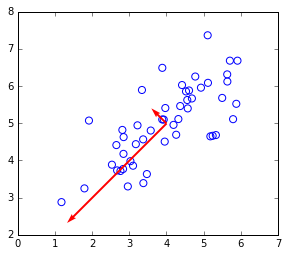

In [34]:
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='blue', s=50)
plt.gca().set_aspect('equal')

# plots the principle components overlay to original data.
# s is shown in descending order, so s[0] > s[1], corresponding to u[:,0] stronger than u[:,1]
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]), u[0,0], u[1,0], scale=s[1], color='r', scale_units='xy')
plt.quiver(np.mean(X[:,0]), np.mean(X[:,1]), u[1,0], u[1,1], scale=s[0], color='r', scale_units='xy')
print('Lines with maximum variations in the dataset.')

In [35]:
print('Top eigenvector: \n')
print('U[:,0] = {:f}, {:f}'.format(*u[:,0]))

Top eigenvector: 

U[:,0] = -0.707107, -0.707107


## Face Image Dataset

In [36]:
faces = loadmat('./machine-learning-ex7/ex7/ex7faces.mat')
faces.keys()
X = faces['X']

In [37]:
def showFaces(data, n_rows, n_cols, dim):
    """Display faces in the data file."""
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(6,6))
    fig.subplots_adjust(wspace=0, hspace=0)

    for i in range(n_rows):
        for j in range(n_cols):
            face = np.reshape(data[i*10+j,:], (dim, dim))
            ax[i][j].axis('off')
            ax[i][j].set_aspect('equal')
            ax[i][j].imshow(face.T, cmap='gray')
    
    print('Images of {:d} faces.'.format(n_rows*n_cols))

Original images.
Images of 100 faces.


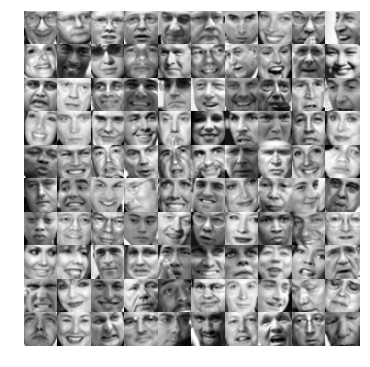

In [38]:
print('Original images.')
showFaces(X[:100], 10, 10, 32)

Reconstructed images from top 100 principal components.
Images of 100 faces.


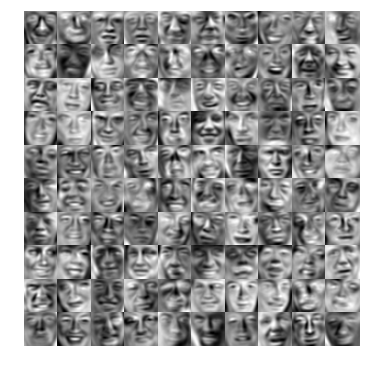

In [39]:
X_norm = featureNormalize(X)
u, s, v = pca(X_norm)
z = np.dot(X_norm, u[:,:100])
face_recovered = np.dot(z, u[:,:100].T)

print('Reconstructed images from top 100 principal components.')
showFaces(face_recovered, 10, 10, 32)